<a href="https://colab.research.google.com/github/soniaeya/mBert/blob/master/mbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing & Data Analysis 👩🏻‍💻

We will start here with the data preprocessing of both the datasets.

We will here remove symbols, special characters, emojiis, duplicates and put all the words to lowercase.

Knowing that one of our datasets is using data from social media posts, we are aware that some of the instances in the data might contain abbreviation, for this project we will be leaving the in the datasets.

We will also be removing some 'useless' data such as columns such as likecount.


In [ ]:
!pip install -U datasets transformers pyarrow pandas
!pip install -U "pyarrow<18.0.0" "datasets" "pandas"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 139.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 150.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1
  Attempting uninstall: datase

Loading the datasets.... 🔌

In [ ]:
from datasets import load_dataset

deFakts = load_dataset("ComplexDataLab/Misinfo_Datasets", "defakts")
faviq = load_dataset("ComplexDataLab/Misinfo_Datasets", "faviq")

print("=== Faviq features ===")
print(faviq["train"].features)
print("Columns:", faviq["train"].column_names)

print("\n=== DeFAKTS features ===")
print(deFakts["train"].features)
print("Columns:", deFakts["train"].column_names)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

defakts/defakts_train.parquet:   0%|          | 0.00/13.3M [00:00<?, ?B/s]

defakts/defakts_test.parquet:   0%|          | 0.00/3.85M [00:00<?, ?B/s]

defakts/defakts_validation.parquet:   0%|          | 0.00/1.99M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/74098 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/21172 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10585 [00:00<?, ? examples/s]

faviq/faviq_train.parquet:   0%|          | 0.00/134M [00:00<?, ?B/s]

faviq/faviq_test.parquet:   0%|          | 0.00/38.5M [00:00<?, ?B/s]

faviq/faviq_validation.parquet:   0%|          | 0.00/19.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/128581 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/36738 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/18369 [00:00<?, ? examples/s]

=== Faviq features ===
{'claim': Value('string'), 'veracity': Value('string'), 'dataset': Value('string'), 'label': Value('string'), 'question': Value('string'), 'answer': Value('string'), 'positive_evidence_text': Value('string'), 'positive_evidence_title': Value('string'), 'negative_evidence_text': Value('string'), 'negative_evidence_title': Value('string'), 'split': Value('string'), 'source': Value('string'), 'source_url': Value('string'), 'article_content': Value('string'), 'article_headline': Value('string'), 'author': Value('string'), 'initial_claim': Value('string'), 'fact1': Value('string'), 'fact2': Value('string'), 'fact3': Value('string'), 'fact4': Value('string'), 'num_hops': Value('string'), 'date': Value('string'), 'similarity': Value('string'), 'like_count': Value('string'), 'retweet_count': Value('string'), 'tweet_text': Value('string'), 'tweet_label': Value('string'), 'evidence_1': Value('string'), 'link_evidence_1': Value('string'), 'source_evidence_1': Value('string'

## 🏷️ Here we are building the label maps and the schema of the data sets!

In this part, we are making sure that both datasets have the same schema of data for consistency, i.e. `{'label':0 or 1,
'text': 'claim'}`

We will also check whether both data set are balanced.

*NOTE: The following operation are **only applied to the train split** of the datasets!!*

In [ ]:
from datasets import ClassLabel

# %%%%%%%%%%%%%%%%%% FAVIQ 2023 %%%%%%%%%%%%%%%%%%%%%%

txt_column_faviq = "claim"
label_column_faviq = "veracity"
label_map_faviq = {"false": 0, "true": 1}

def standardize_faviq(example):
    return {
        "text": example[txt_column_faviq],
        "label": label_map_faviq[example[label_column_faviq]],
    }

faviq_model = faviq.map(
    standardize_faviq,
    remove_columns=faviq["train"].column_names
)

print(faviq_model)
print(faviq_model["train"][0])

# %%%%%%%%%%%%%%%%%% DEFAKTS %%%%%%%%%%%%%%%%%%%%%%

txt_column_deFakts = "claim"
label_column_deFakts = "label"
label_map_deFakts = {"false": 0, "true": 1}


# keeping the rows where the labels are either true or false
valid_labels_deFakts = {"true", "false"}

deFakts_binary = deFakts.filter(lambda example: example[label_column_deFakts] in valid_labels_deFakts)


print("Label values after filtering:", set(deFakts_binary["train"][label_column_deFakts]))

def standardize_deFakts(example):
    return {
        "text": example[txt_column_deFakts],
        "label": label_map_deFakts[example[label_column_deFakts]],
    }

deFakts_model = deFakts_binary.map(
    standardize_deFakts,
    remove_columns=deFakts_binary["train"].column_names
)

print(deFakts_model)
print(deFakts_model["train"][0])


Map:   0%|          | 0/128581 [00:00<?, ? examples/s]

Map:   0%|          | 0/36738 [00:00<?, ? examples/s]

Map:   0%|          | 0/18369 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 128581
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 36738
    })
    validation: Dataset({
        features: ['label', 'text'],
        num_rows: 18369
    })
})
{'label': 1, 'text': 'the stern of a boat is located at aft port according to the original definition.'}


Filter:   0%|          | 0/74098 [00:00<?, ? examples/s]

Filter:   0%|          | 0/21172 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10585 [00:00<?, ? examples/s]

Label values after filtering: {'true', 'false'}


Map:   0%|          | 0/13932 [00:00<?, ? examples/s]

Map:   0%|          | 0/4090 [00:00<?, ? examples/s]

Map:   0%|          | 0/1986 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 13932
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 4090
    })
    validation: Dataset({
        features: ['label', 'text'],
        num_rows: 1986
    })
})
{'label': 0, 'text': 'Abtreibung ist nach der 13ten Wo. gleichbedeutend  mit einem Mord! Wer danach abtreibt ist ein Mörder und sollte auch wie einer verurteilt werden.'}


🧹 In the following step, we are cleaning the datasets by doing the following:



*   Removing emojis
*   Removing special characters
*   Putting the whole dataset in lowercase
*   Handle if an instance is none
*   Remove leading and trailing spaces



In [ ]:
import re

# to remove common emoji
emoji_pattern = re.compile(
    "["                     # start of character group
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags
    u"\U00002700-\U000027BF"  # dingbats
    u"\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
    "]+",
    flags=re.UNICODE,
)
# to keep word characters
special_pattern = re.compile(r"[^\w\s.,!?';:]+", flags=re.UNICODE)


def advanced_clean(example):

  text = example["text"]

  # handle if we have none
  if text is None:
    text = ""

  # remove leading/trailing whitespaces
  text = text.strip()

  # lowercase the whole text
  text = text.lower()

  # remove emojis
  text = emoji_pattern.sub("", text)

  # remove special characters - keep letters/digits/basic punctuation - put a white space to make sure words are not getting concatenated
  text = special_pattern.sub(" ", text)

  # collapse multiple spaces
  text = re.sub(r"\s+", " ", text).strip()

  example["text"] = text

  return example

# apply to all splits for both datasets
faviq_model   = faviq_model.map(advanced_clean)
deFakts_model = deFakts_model.map(advanced_clean)

print("Favid Model after cleaning:")
print(faviq_model["train"][0])

print("DeFakts Model after cleaning:")
print(deFakts_model["train"][0])




Map:   0%|          | 0/128581 [00:00<?, ? examples/s]

Map:   0%|          | 0/36738 [00:00<?, ? examples/s]

Map:   0%|          | 0/18369 [00:00<?, ? examples/s]

Map:   0%|          | 0/13932 [00:00<?, ? examples/s]

Map:   0%|          | 0/4090 [00:00<?, ? examples/s]

Map:   0%|          | 0/1986 [00:00<?, ? examples/s]

Favid Model after cleaning:
{'label': 1, 'text': 'the stern of a boat is located at aft port according to the original definition.'}
DeFakts Model after cleaning:
{'label': 0, 'text': 'abtreibung ist nach der 13ten wo. gleichbedeutend mit einem mord! wer danach abtreibt ist ein mörder und sollte auch wie einer verurteilt werden.'}


👯‍♀️ We will now remove exact duplicated from the datasets to make sure our models are able to train on the cleanest data possible!!

Note that we are only removing exact duplicates, meaning that the instance has the same claim and the same label.

In [ ]:
from collections import Counter
from datasets import DatasetDict

def deduplicate_split(ds):
    """Remove exact duplicate (text, label) pairs in one split."""
    seen = set()

    def is_unique(example):
        instance = (example["text"], example["label"])

        if instance in seen:
            return False

        seen.add(instance)
        return True

    return ds.filter(is_unique)

print("Faviq TRAIN label counts BEFORE:", Counter(faviq_model["train"]["label"]))
print("DeFAKTS TRAIN label counts BEFORE:", Counter(deFakts_model["train"]["label"]))

# removing the exact duplicates in the 3 splits (test, validation, train)
faviq_model = DatasetDict({
    split: deduplicate_split(faviq_model[split])
    for split in ["train", "validation", "test"]
})

deFakts_model = DatasetDict({
    split: deduplicate_split(deFakts_model[split])
    for split in ["train", "validation", "test"]
})

print("Faviq TRAIN label counts AFTER:", Counter(faviq_model["train"]["label"]))
print("DeFAKTS TRAIN label counts AFTER:", Counter(deFakts_model["train"]["label"]))


Faviq TRAIN label counts BEFORE: Counter({0: 64593, 1: 63988})
DeFAKTS TRAIN label counts BEFORE: Counter({1: 8133, 0: 5799})


Filter:   0%|          | 0/128581 [00:00<?, ? examples/s]

Filter:   0%|          | 0/18369 [00:00<?, ? examples/s]

Filter:   0%|          | 0/36738 [00:00<?, ? examples/s]

Filter:   0%|          | 0/13932 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1986 [00:00<?, ? examples/s]

Filter:   0%|          | 0/4090 [00:00<?, ? examples/s]

Faviq TRAIN label counts AFTER: Counter({0: 64560, 1: 63520})
DeFAKTS TRAIN label counts AFTER: Counter({1: 8123, 0: 5781})


🔬 We will run some code to check the length of the datasets after all the cleaning and look at whether the datasets labels are currently balanced!

In [ ]:
from collections import Counter
import numpy as np

def describe_dataset(ds, name):
    print(f"\n===== {name} =====")
    for split in ["train", "validation", "test"]:
        split_ds = ds[split]
        texts = split_ds["text"]
        labels = split_ds["label"]

        lengths = [len(t.split()) for t in texts]

        print(f"\n--- {split.upper()} ---")
        print(f"n           = {len(split_ds)}")
        print(f"label_dist  = {Counter(labels)}")
        print(f"avg_len     = {np.mean(lengths):.1f}")


describe_dataset(faviq_model, "FAVIQ (EN)")
describe_dataset(deFakts_model, "DeFAKTS (DE)")



===== FAVIQ (EN) =====

--- TRAIN ---
n           = 128080
label_dist  = Counter({0: 64560, 1: 63520})
avg_len     = 10.8

--- VALIDATION ---
n           = 18364
label_dist  = Counter({1: 9188, 0: 9176})
avg_len     = 10.7

--- TEST ---
n           = 36707
label_dist  = Counter({0: 18488, 1: 18219})
avg_len     = 10.8

===== DeFAKTS (DE) =====

--- TRAIN ---
n           = 13904
label_dist  = Counter({1: 8123, 0: 5781})
avg_len     = 25.5

--- VALIDATION ---
n           = 1986
label_dist  = Counter({1: 1175, 0: 811})
avg_len     = 25.5

--- TEST ---
n           = 4089
label_dist  = Counter({1: 2467, 0: 1622})
avg_len     = 25.5



### Dataset Comparison: FAVIQ (English) vs DeFAKTS (German)

| Property                | **FAVIQ (EN)**                         | **DeFAKTS (DE)**                      |
|-------------------------|------------------------------------------|----------------------------------------|
| **Train size**          | 128,080 examples                         | 13,904 examples                        |
| **Validation size**     | 18,364 examples                          | 1,986 examples                         |
| **Test size**           | 36,707 examples                          | 4,089 examples                         |
| **Label balance (train)** | 0: 64,560 (50.4%)<br>1: 63,520 (49.6%) | 0: 5,781 (41.6%)<br>1: 8,123 (58.4%)    |
| **Average claim length** | ~10.8 words (shorter)         | ~25.5 words (longer, more detailed)    |
| **Deduplication impact** | Removed <0.5% of samples (minimal)       | Removed <0.2% of samples (minimal)     |
| **Language**            | English                                  | German                                 |
| **Task**                | Binary factuality classification          | Binary factuality classification       |


---



From the cell above, we can overse that both data sets seem to be balanced!
Faviq is a large data set with balanced labels.
DeFakts is smaller but still has a reasonable size, and is less balanced than the EN dataset, but such a difference should not prevent us to have a good metrics such as F1.

However, we observe that there is quite a difference between the average length of the each claim in the English (≈ 10.7) and German (≈ 25.5) datasets. This might show that the German dataset has richer text and context than Faviq and might be able to provider a richer semantic meaning.

## 🎛️ Zipf's Law - Let's look at the word distribution in each of the data sets

To better interpret the results we will have with the different models

In [ ]:
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt

# simple word regex => text already cleaned & lowercased
WORD_PATTERN = re.compile(r"\w+", flags=re.UNICODE)

def collect_word_counts(hf_ds, split="train"):
    """
    Build a frequency Counter of words for a given split of a DatasetDict
    (expects a 'text' column).
    """
    texts = hf_ds[split]["text"]
    counter = Counter()

    for text in texts:
        if not isinstance(text, str):
            continue

# previously lowercased the text
        tokens = WORD_PATTERN.findall(text.lower())
        counter.update(tokens)

    return counter


def plot_top_words(counter, dataset_name: str, k: int = 20):
    """
    Bar plot of the top-k most frequent words in a dataset.
    """
    most_common = counter.most_common(k)
    words = [w for w, _ in most_common]
    freqs = [c for _, c in most_common]

    plt.figure(figsize=(10, 4))
    plt.bar(words, freqs)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Frequency")
    plt.title(f"Top {k} words – {dataset_name}")
    plt.tight_layout()
    plt.show()


def plot_zipf(counter, dataset_name: str, max_rank: int = 5000):
    """
    Zipf-style plot: rank vs frequency on log–log scales.
    Shows that a few words are extremely frequent and
    most words are rare (Zipf's law).
    """
    freqs = np.array(sorted(counter.values(), reverse=True))
    ranks = np.arange(1, len(freqs) + 1)

    if max_rank is not None:
        freqs = freqs[:max_rank]
        ranks = ranks[:max_rank]

    plt.figure(figsize=(5, 4))
    plt.loglog(ranks, freqs)
    plt.xlabel("Rank (log scale)")
    plt.ylabel("Frequency (log scale)")
    plt.title(f"Zipf plot – {dataset_name}")
    plt.grid(True, which="both", ls="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


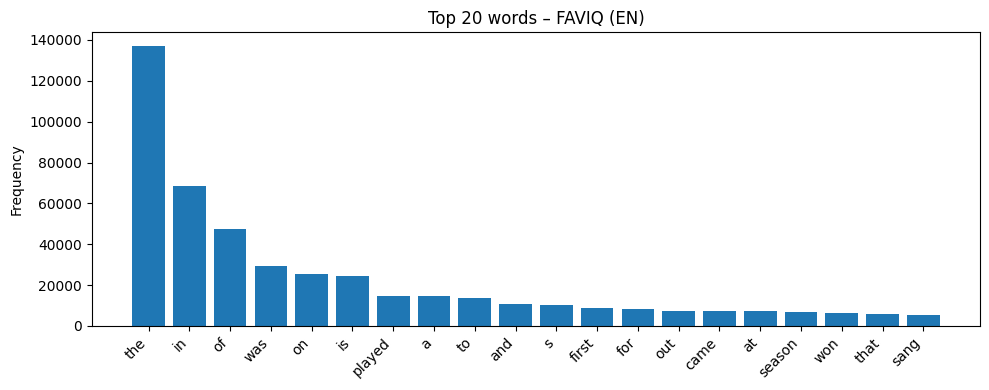

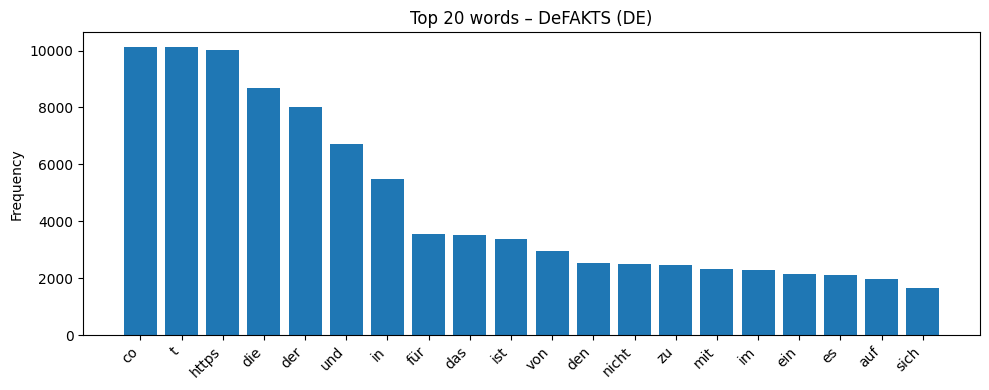

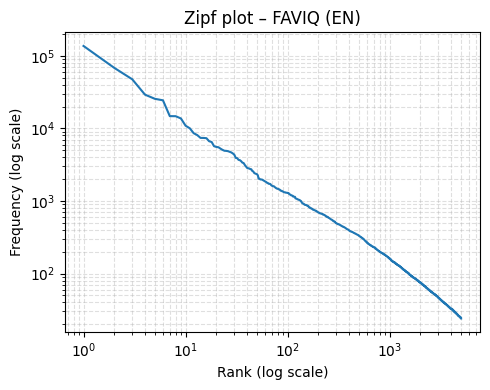

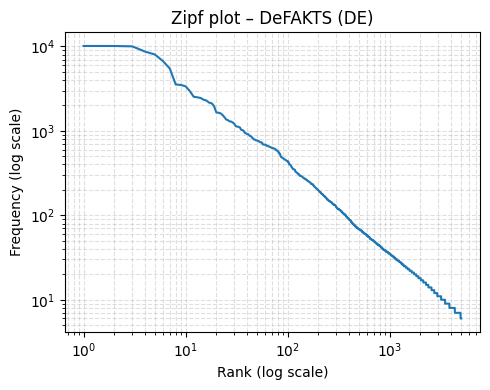

In [ ]:
# word counts on TRAIN
faviq_counts   = collect_word_counts(faviq_model,   split="train")
defakts_counts = collect_word_counts(deFakts_model, split="train")

# top words
plot_top_words(faviq_counts,   "FAVIQ (EN)",   k=20)
plot_top_words(defakts_counts, "DeFAKTS (DE)", k=20)

# Zipf curves (rank–frequency)
plot_zipf(faviq_counts,   "FAVIQ (EN)")
plot_zipf(defakts_counts, "DeFAKTS (DE)")


### Zipf's Law without Stopwords!
Let's see what we would be getting if we removed stopwords in both languages!

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_en = set(stopwords.words('english'))
stopwords_de = set(stopwords.words('german'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from collections import Counter
import re

WORD_PATTERN = re.compile(r"\w+", flags=re.UNICODE)

def collect_word_counts_no_stopwords(hf_ds, split="train", language="en"):
    """
    Count words the dataset split while removing stopwords.
    language: "en" or "de".
    """
    if language == "en":
        stop = stopwords_en
    elif language == "de":
        stop = stopwords_de
    else:
        stop = set()

    texts = hf_ds[split]["text"]
    counter = Counter()

    for text in texts:
        if not isinstance(text, str):
            continue

        tokens = WORD_PATTERN.findall(text.lower())
        tokens = [t for t in tokens if t not in stop]   # REMOVE STOPWORDS
        counter.update(tokens)

    return counter


PLOTTING


In [ ]:
def plot_top_words(counter, dataset_name: str, k=20):
    most_common = counter.most_common(k)
    words = [w for w, _ in most_common]
    freqs = [c for _, c in most_common]

    plt.figure(figsize=(10, 4))
    plt.bar(words, freqs)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Frequency")
    plt.title(f"Top {k} content words – {dataset_name}")
    plt.tight_layout()
    plt.show()

def plot_zipf(counter, dataset_name: str, max_rank=5000):
    freqs = np.array(sorted(counter.values(), reverse=True))
    ranks = np.arange(1, len(freqs) + 1)

    if max_rank is not None:
        freqs = freqs[:max_rank]
        ranks = ranks[:max_rank]

    plt.figure(figsize=(5,4))
    plt.loglog(ranks, freqs)
    plt.xlabel("Rank (log scale)")
    plt.ylabel("Frequency (log scale)")
    plt.title(f"Zipf plot (no stopwords) – {dataset_name}")
    plt.grid(True, which="both", ls="--", alpha=0.4)
    plt.tight_layout()
    plt.show()



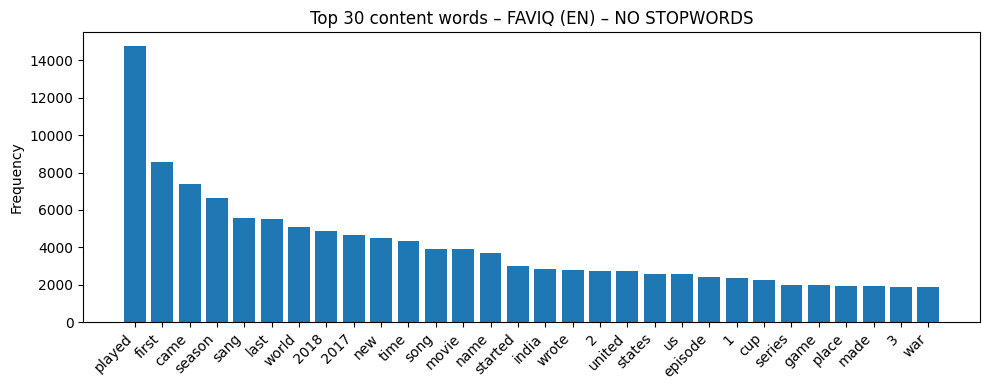

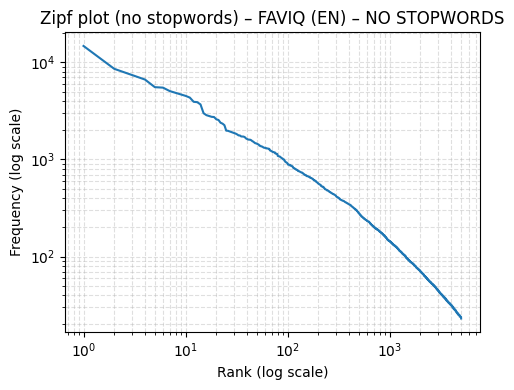

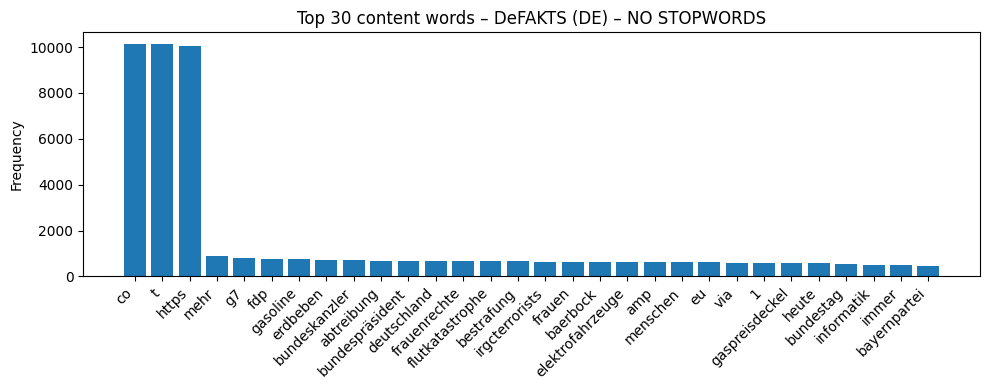

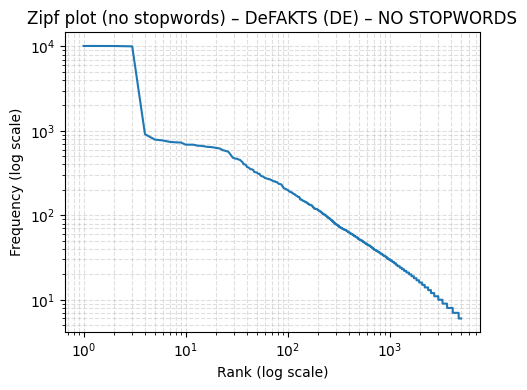

In [ ]:
# English: FAVIQ
faviq_counts_no_sw = collect_word_counts_no_stopwords(
    faviq_model, split="train", language="en"
)

plot_top_words(faviq_counts_no_sw, "FAVIQ (EN) – NO STOPWORDS", k=30)
plot_zipf(faviq_counts_no_sw, "FAVIQ (EN) – NO STOPWORDS")

# German: DeFAKTS
defakts_counts_no_sw = collect_word_counts_no_stopwords(
    deFakts_model, split="train", language="de"
)

plot_top_words(defakts_counts_no_sw, "DeFAKTS (DE) – NO STOPWORDS", k=30)
plot_zipf(defakts_counts_no_sw, "DeFAKTS (DE) – NO STOPWORDS")


### ⛓️‍💥Per Label Zipf's Law with no stopwords
Let's look at the distribution of words per a label - we will look at the distribution of the words for the true and false claims to see if we are able to notice pattern of words.

In [ ]:
from collections import Counter
import re

WORD_PATTERN = re.compile(r"\w+", flags=re.UNICODE)

def word_counts_by_label(hf_ds, split="train", language="en"):
    """
    Returns two Counters:
      - counter_true  for label == 1
      - counter_false for label == 0
    Stopwords are removed based on language ("en" or "de").
    """
    if language == "en":
        stop = stopwords_en
    else:
        stop = stopwords_de

    texts = hf_ds[split]["text"]
    labels = hf_ds[split]["label"]

    counter_true = Counter()
    counter_false = Counter()

    for text, label in zip(texts, labels):
        if not isinstance(text, str):
            continue

        tokens = WORD_PATTERN.findall(text.lower())
        tokens = [t for t in tokens if t not in stop]

        if label == 1:
            counter_true.update(tokens)
        elif label == 0:
            counter_false.update(tokens)

    return counter_true, counter_false


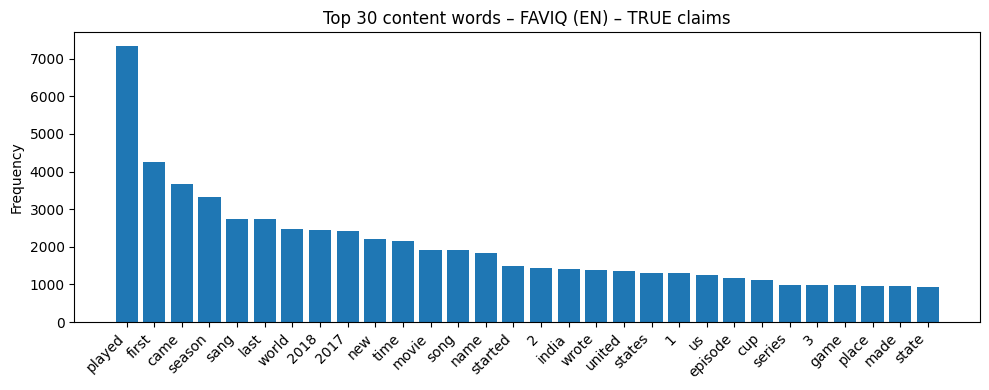

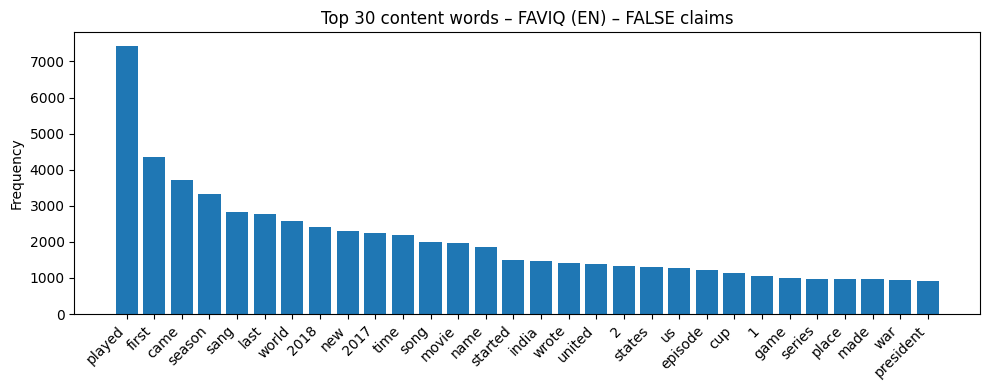

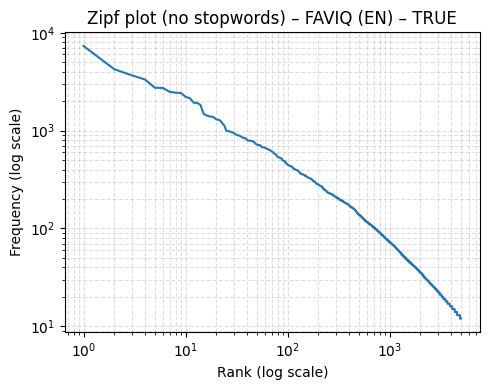

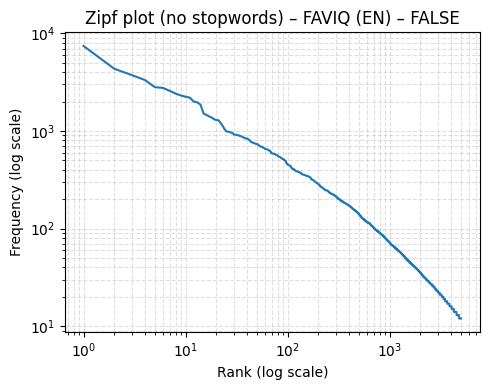

In [ ]:
faviq_true, faviq_false = word_counts_by_label(
    faviq_model, split="train", language="en"
)

# Top words
plot_top_words(faviq_true,  "FAVIQ (EN) – TRUE claims",  k=30)
plot_top_words(faviq_false, "FAVIQ (EN) – FALSE claims", k=30)

# Zipf curves
plot_zipf(faviq_true,  "FAVIQ (EN) – TRUE")
plot_zipf(faviq_false, "FAVIQ (EN) – FALSE")


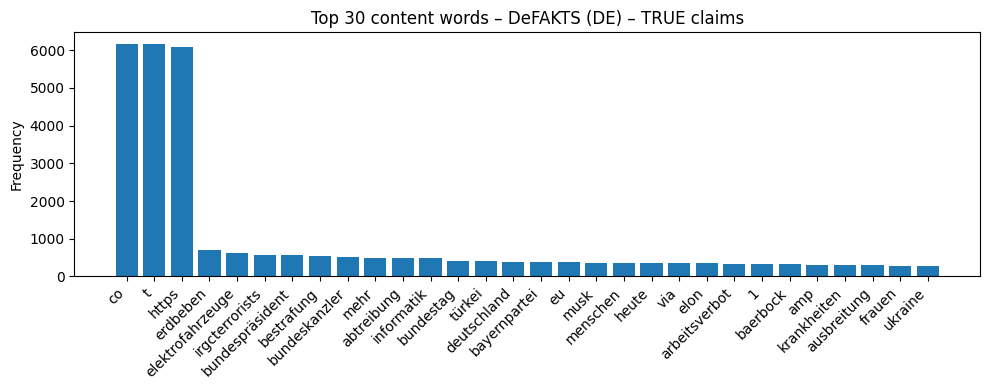

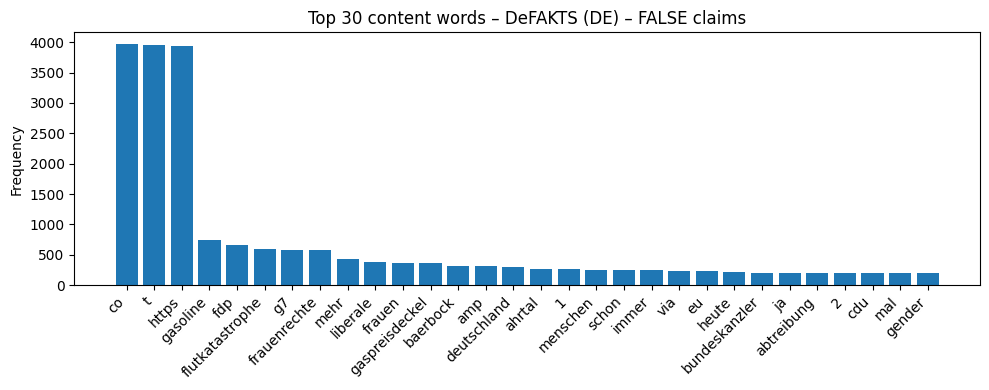

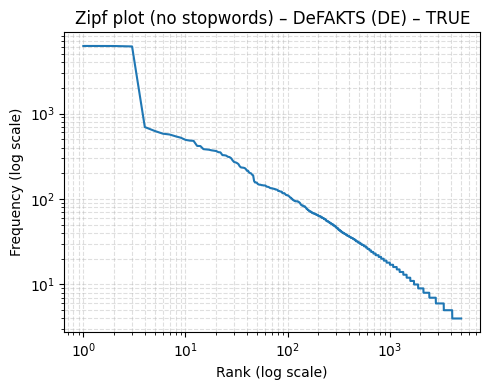

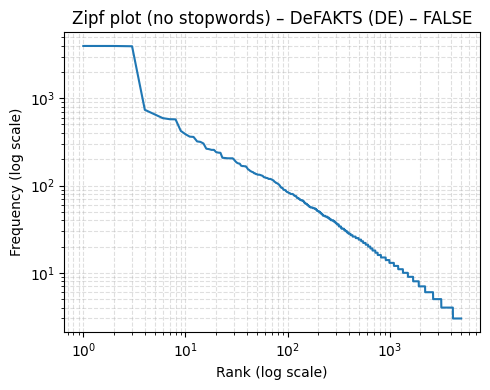

In [ ]:
defakts_true, defakts_false = word_counts_by_label(
    deFakts_model, split="train", language="de"
)

plot_top_words(defakts_true,  "DeFAKTS (DE) – TRUE claims",  k=30)
plot_top_words(defakts_false, "DeFAKTS (DE) – FALSE claims", k=30)

plot_zipf(defakts_true,  "DeFAKTS (DE) – TRUE")
plot_zipf(defakts_false, "DeFAKTS (DE) – FALSE")


As we can observe from the graphs above, that the English and German datasets are very different lexically. We believe that those difference will really impact their performance with each language.

*   The distribution of words for DeFAKTS between both labels is a lot more varied than for the english dataset.


**FAVIQ**

👉 The distribution of words for the FAVIQ dataset is nearly the same across both the true and false classes.

👉 The most frequent words in for both labels appear in almost the same order, meaning that they have practically the same frequencies. We see that the words frequencies do not differ between the true and false labels.

👉 True and False are sharing practically the same vocabulary. Therefore, we could say that the dataset had little to no lexical separtion between the true and false labels.

👉 We believe that learning a pattern from this dataset will be much harder than with the German one.

⭐️ Because of this we expect to get a pretty low performance on all our models on the FAVIQ dataset. We hypothesise that the models will have an important difficulty of generalizing and making accurate assumption with the English dataset at it seems like there aren't enough semantic differences between the true and false labels.



**DeFAKTS**

👉 In the german dataset we observe a good difference between the vocabulary used in true VS false claim.

👉 **FALSE claims** contain words that are usually used in a political contexes, ideological issues, controversial and emotionnaly charged topics. We believe that the following words can be used in very discriminative contexts, thus it might be easier to make conclustion using the German dataset.

We also feel like that a lot of the terms found in this list can also induce controversial and polorized opinions.


*   gasoline
*   ruckkatastrophe
*   fdp (free democratic party)
*   afd (alternative for germany => political party)
*   gender
*   frauenrechte (women’s rights)
*   gaspreise (gas prices)
*   abtreibung (abortion)

👉 **TRUE claims** in this dataset have words that can be associated with a neutral informational contents, and used in admnistrative and governmental contexts.


Meaning that they are usuallly less discriminative and less polarizing than the words we have found in the FALSE label.
*   bundespräsident (federal president)
*   bundeskanzler (federal chancellor
*   informatik (computer science)
*   bundestag (federal assembly)
*   eu (Europeean Union)
*   menschen (people)
*   heute (today)
*   ukraine

⭐️ We expect to be able have a pretty good performance with the German dataset as there is a pretty good difference between the voca








#🤖 BERT Models

Let's now set up the tranformer/BERT models for Faviq and DeFakts.

We will here be using pretrained transformer encoders that have some knowledge about languages.

Note that for this part we will be using the same data preprocessing that was previously implemented, we believe that it won't have a big impact on the model's ability of prediction as we are just making the text simpler by removing noise, such as emojiis, odd symbols, leading whitespaces etc.


---

We will be using here:


*   Faviq (EN) : `bert-base-uncased`
*   DeFakts (DE): `bert-base-german-cased`




In [ ]:
# ============== INSTALLS AND IMPORTS ==============

!pip install -q transformers accelerate

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    TrainingArguments,
    Trainer,
)

from datasets import DatasetDict
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import torch

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
def make_tokenize_bert(tokenizer, max_length=128):

    def tokenize_fn(batch):

        return tokenizer(
            batch["text"],
            truncation=True,
            max_length=max_length,
            padding=False,   # padding will be done later by DataCollator
        )
    return tokenize_fn


In [ ]:
def compute_metrics_bert (eval_pred):
  logits, labels = eval_pred
  preds = np.argmax(logits, axis=-1)

  acc = accuracy_score(labels, preds)
  precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="macro", zero_division=0)

  return {
      "accuracy": acc,
      "macro-precision": precision,
      "macro-recall": recall,
      "macro-f1": f1
  }

📊 For plotting!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_training_loss_by_epoch(trainer, title: str = "Training loss by epoch"):
    """
    Plots the *average* training loss per (integer) epoch using trainer.state.log_history.
    x-axis = epoch number (1, 2, 3, ...) instead of raw fractional epochs.
    """
    epoch_losses = {}

    for entry in trainer.state.log_history:
        # entries with training loss usually have 'loss' and 'epoch'
        if "loss" in entry and "epoch" in entry:

            ep = int(entry["epoch"])
            epoch_losses.setdefault(ep, []).append(entry["loss"])

    if not epoch_losses:
        print("No (loss, epoch) entries found in trainer.state.log_history.")
        print("Sample log_history entry:", trainer.state.log_history[:3])
        return

    # average loss per (integer) epoch
    epochs = sorted(epoch_losses.keys())
    avg_losses = [np.mean(epoch_losses[e]) for e in epochs]

    plt.figure()
    plt.plot(epochs, avg_losses, marker="o")
    plt.xlabel("Epoch")
    plt.ylabel("Average training loss")
    plt.title(title)
    plt.grid(True)
    plt.show()



# %%%%%%

def print_bert_metrics_table(val_metrics: dict, test_metrics: dict, title: str = ""):
    """
    Prints a compact comparison table (val vs test) for a BERT model.
    Uses keys like 'eval_loss', 'eval_accuracy', 'eval_macro-precision', etc.
    """
    def get(m, base):
        # helper to fetch 'eval_<base>' or '<base>'
        return m.get(f"eval_{base}", m.get(base, float("nan")))

    rows = [
        ("validation",
         get(val_metrics, "loss"),
         get(val_metrics, "accuracy"),
         get(val_metrics, "macro-precision"),
         get(val_metrics, "macro-recall"),
         get(val_metrics, "macro-f1")),
        ("test",
         get(test_metrics, "loss"),
         get(test_metrics, "accuracy"),
         get(test_metrics, "macro-precision"),
         get(test_metrics, "macro-recall"),
         get(test_metrics, "macro-f1")),
    ]

    if title:
        print(f"=== {title} ===")

    header = f"{'split':>10} | {'loss':>8} | {'acc':>8} | {'P':>8} | {'R':>8} | {'F1':>8}"
    print(header)
    print("-" * len(header))

    for split, loss, acc, p, r, f1 in rows:
        print(f"{split:>10} | {loss:8.4f} | {acc:8.3f} | {p:8.3f} | {r:8.3f} | {f1:8.3f}")






## 🔋 BERT Faviq (EN) (bert-base-uncased)
Loading the tokenizer and model!

In [ ]:
model_en = "bert-base-uncased"

tokenizer_en = AutoTokenizer.from_pretrained(model_en)

model_en = AutoModelForSequenceClassification.from_pretrained(
    model_en,
    num_labels=2,
    id2label = {0:"false", 1: "true"},
    label2id = {"false":0, "true": 1}
    ).to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🧩 Tokenize the english dataset.

In [ ]:
tokenize_en = make_tokenize_bert(tokenizer_en, max_length=128)

faviq_tokenized = faviq_model.map(
    tokenize_en,
    batched=True,
    remove_columns = ["text"] # keep label + tokenized features
    )

faviq_tokenized
faviq_tokenized["train"][0]

print (faviq_tokenized["train"][0])

Map:   0%|          | 0/18364 [00:00<?, ? examples/s]

{'label': 1, 'input_ids': [101, 1996, 8665, 1997, 1037, 4049, 2003, 2284, 2012, 16638, 3417, 2429, 2000, 1996, 2434, 6210, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


🏓 Padding the batch!

In [ ]:
data_collator_en = DataCollatorWithPadding(tokenizer=tokenizer_en)

💪🏼 Setting up the baseline training arguments.


In [ ]:
!pip install -U "transformers[torch]"


In [ ]:
!rm -rf bert_faviq_en
!rm -rf bert_defakts_de
!rm -rf checkpoints/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setting up the training arguments!



*   Batch Size = 8
*   Learning rate = 2e-5
*   Weight Decay 0.1
*   Number of Epochs = 5





In [ ]:
from transformers import TrainingArguments

batch_size = 8 # WE KEPTS THE BATCH SIZE SMALL TO MINIZE THE RISK OF OVERFITTING

training_args_en = TrainingArguments(
    # output_dir="./bert_faviq_en",

    output_dir="/content/drive/MyDrive/MASTERS/FALL2025/COMP6781/TeamWork6781/FinalProject/BERT-FAVIQ"
,

    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    learning_rate=2e-5, # SMALL LEARNING RATE TO MAKE SURE THAT WE ARE NOT MISSING OUR OPTIMAL
    weight_decay=0.01,
)


In [ ]:
trainer_en = Trainer (
    model = model_en,
    args = training_args_en,
    train_dataset = faviq_tokenized["train"],
    eval_dataset = faviq_tokenized["validation"],
    tokenizer=tokenizer_en,
    data_collator=data_collator_en,
    compute_metrics = compute_metrics_bert

)

/tmp/ipython-input-917636397.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_en = Trainer (


### ⚾️ Base Line run for Faviq (EN)
Training and Evaluating!





Step,Training Loss
500,0.700200
1000,0.695800
1500,0.695100
2000,0.694500
2500,0.698400
3000,0.698000
3500,0.697800
4000,0.697300
4500,0.697200
5000,0.696800


=== ENGLISH (FAVIQ) – VALIDATION ===


{'eval_loss': 0.693149209022522, 'eval_accuracy': 0.49967327379655846, 'eval_macro-precision': 0.24983663689827923, 'eval_macro-recall': 0.5, 'eval_macro-f1': 0.33318809005083516, 'eval_runtime': 27.0637, 'eval_samples_per_second': 678.548, 'eval_steps_per_second': 84.837, 'epoch': 5.0}

=== ENGLISH (FAVIQ) – TEST ===
{'eval_loss': 0.6931377649307251, 'eval_accuracy': 0.5036641512518049, 'eval_macro-precision': 0.25183207562590243, 'eval_macro-recall': 0.5, 'eval_macro-f1': 0.33495787661925897, 'eval_runtime': 58.7705, 'eval_samples_per_second': 624.582, 'eval_steps_per_second': 78.083, 'epoch': 5.0}


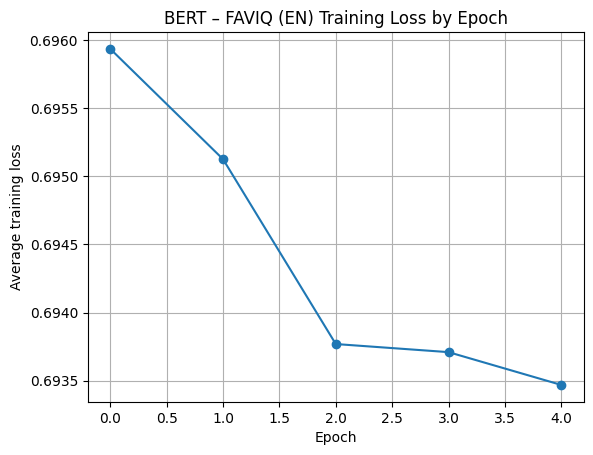

=== BERT – FAVIQ (EN) metrics ===
     split |     loss |      acc |        P |        R |       F1
-----------------------------------------------------------------
validation |   0.6931 |    0.500 |    0.250 |    0.500 |    0.333
      test |   0.6931 |    0.504 |    0.252 |    0.500 |    0.335


In [ ]:
# training
trainer_en.train()

# evaluate on validation
print("=== ENGLISH (FAVIQ) – VALIDATION ===")
metrics_val_en = trainer_en.evaluate(faviq_tokenized["validation"])
print(metrics_val_en)

# 3) evaluate on test
print("\n=== ENGLISH (FAVIQ) – TEST ===")
metrics_test_en = trainer_en.evaluate(faviq_tokenized["test"])
print(metrics_test_en)

# plot loss by epoch
plot_training_loss_by_epoch(
    trainer_en,
    title="BERT – FAVIQ (EN) Training Loss by Epoch"
)

# 5) print compact metrics table
print_bert_metrics_table(
    metrics_val_en,
    metrics_test_en,
    title="BERT – FAVIQ (EN) metrics"
)


## 🔋 BERT DeFakts (DE) (bert-base-cased)

Loading the tokenizer and model.


In [ ]:

model_name_de = "bert-base-german-cased"

tokenizer_de = AutoTokenizer.from_pretrained(model_name_de)

model_de = AutoModelForSequenceClassification.from_pretrained(
    model_name_de,
    num_labels=2,
    id2label={0: "false", 1: "true"},
    label2id={"false": 0, "true": 1},
).to(device)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/255k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/485k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-german-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenizing the DE dataset.

In [ ]:
tokenize_de = make_tokenize_bert(tokenizer_de, max_length=128)

defakts_tokenized = deFakts_model.map(
    tokenize_de,
    batched = True,
    remove_columns = ["text"]
)

Map:   0%|          | 0/13904 [00:00<?, ? examples/s]

Map:   0%|          | 0/1986 [00:00<?, ? examples/s]

Map:   0%|          | 0/4089 [00:00<?, ? examples/s]

🏓 Padding the batch!

In [ ]:
data_collator_de = DataCollatorWithPadding(tokenizer=tokenizer_de)

💪🏼 Setting up the baseline training arguments.

*   Batch Size = 8
*   Learning rate = 2e-5
*   Weight Decay 0.1
*   Number of Epochs = 5

In [ ]:
!pip install -U "transformers[torch]"

In [ ]:
from transformers import TrainingArguments

batch_size = 8

training_args_de = TrainingArguments(
    # output_dir="./bert_faviq_de",
    output_dir = "/content/drive/MyDrive/MASTERS/DeFAKTS",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    learning_rate=2e-5,
    weight_decay=0.01,
)

In [ ]:
trainer_de = Trainer (
    model = model_de,
    args = training_args_de,
    train_dataset = defakts_tokenized["train"],
    eval_dataset = defakts_tokenized["validation"],
    tokenizer=tokenizer_de,
    data_collator=data_collator_de,
    compute_metrics = compute_metrics_bert

)

/tmp/ipython-input-3475177050.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_de = Trainer (


### ⚾️ Base Line run for DeFakts (DE)
Training and Evaluating!

Step,Training Loss
500,0.520500
1000,0.417400
1500,0.381600
2000,0.333100
2500,0.305200
3000,0.294200
3500,0.291100
4000,0.179700
4500,0.197000
5000,0.170100


=== GERMAN (DeFAKTS) – VALIDATION ===


{'eval_loss': 1.0296859741210938, 'eval_accuracy': 0.8549848942598187, 'eval_macro-precision': 0.8545631920394128, 'eval_macro-recall': 0.8432594380460162, 'eval_macro-f1': 0.8477123626139559, 'eval_runtime': 3.6135, 'eval_samples_per_second': 549.604, 'eval_steps_per_second': 68.908, 'epoch': 5.0}

=== GERMAN (DeFAKTS) – TEST ===
{'eval_loss': 1.105559229850769, 'eval_accuracy': 0.8454389826363414, 'eval_macro-precision': 0.8404228787421176, 'eval_macro-recall': 0.8346373111508409, 'eval_macro-f1': 0.8372164158797029, 'eval_runtime': 8.4001, 'eval_samples_per_second': 486.779, 'eval_steps_per_second': 60.951, 'epoch': 5.0}


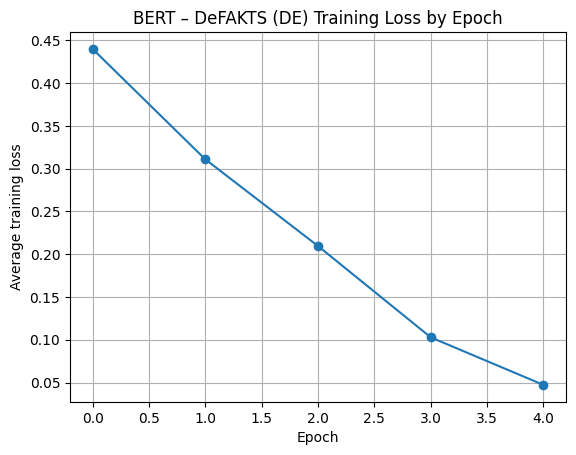

=== BERT – DeFAKTS (DE) metrics ===
     split |     loss |      acc |        P |        R |       F1
-----------------------------------------------------------------
validation |   1.0297 |    0.855 |    0.855 |    0.843 |    0.848
      test |   1.1056 |    0.845 |    0.840 |    0.835 |    0.837


In [ ]:
# training
trainer_de.train()

# 2) evaluate on validation
print("=== GERMAN (DeFAKTS) – VALIDATION ===")
metrics_val_de = trainer_de.evaluate(defakts_tokenized["validation"])
print(metrics_val_de)

# 3) evaluate on test
print("\n=== GERMAN (DeFAKTS) – TEST ===")
metrics_test_de = trainer_de.evaluate(defakts_tokenized["test"])
print(metrics_test_de)

# plot loss by epoch
plot_training_loss_by_epoch(
    trainer_de,
    title="BERT – DeFAKTS (DE) Training Loss by Epoch"
)

# metrics table for DE
print_bert_metrics_table(
    metrics_val_de,
    metrics_test_de,
    title="BERT – DeFAKTS (DE) metrics"
)


#📚 Sources


[Zipfs Law](https://www.youtube.com/watch?v=AlNKKRXCq7k)

[German Bert](https://huggingface.co/google-bert/bert-base-german-cased)

[English Bert](https://huggingface.co/google-bert/bert-base-uncased)

[Data Collator](https://huggingface.co/docs/transformers/v4.32.1/main_classes/data_collator)


